In [73]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import math

In [74]:
def lineIsSafe(line: np.array):
    if line[0] == "" or line[0] == None:
        return False
    elif line[1] == "" or line[1] == None:
        return False
    elif line[2] == "" or line[2] == None:
        return False
    elif line[3] == "" or line[3] == None:
        return False
    elif line[4] == "" or line[4] == None or np.isnan(line[4]) or math.isnan(float(line[4])):
        return False
    elif line[5] != 1 and line[5] != 0 or np.isnan(line[5]):
        return False
    elif line[6] != 1 and line[6] != 0 or np.isnan(line[6]):
        return False
    elif line[7] != 1 and line[7] != 0 or np.isnan(line[7]):
        return False
    elif line[8] != 1 and line[8] != 0 or np.isnan(line[8]):
        return False
    elif line[9] != 1 and line[9] != 0 or np.isnan(line[9]):
        return False
    elif np.isnan(line[10]):
        return False
    elif np.isnan(line[11]):
        return False
    elif line[12] != 1 and line[12] != 0 or np.isnan(line[12]):
        return False
    elif line[16] != 1 and line[16] != 0 or np.isnan(line[16]):
        return False
    return True

In [76]:
def cleannerDatabase(parquetPath: str):
    print("*--abrindo database--*")
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    columns = dataframe.columns
    print("*--convertendo database--*")
    trash = dataframe.to_numpy()
    print("*--percorrendo a database--*")
    count = 0
    indexes = []
    for row in trash:
        if row[13] != 1 and row[13] != 0 or np.isnan(row[13]):
            row[13] = 0
        if row[14] != 1 and row[14] != 0 or np.isnan(row[14]):
            row[14] = 0
        if row[15] != 1 and row[15] != 0 or np.isnan(row[15]):
            row[15] = 0
        if(lineIsSafe(row) == False):
            indexes.append(count)
            count += 1
    print("*--deletando os itens anomalos--*")
    trash = np.delete(trash, indexes, axis=0)
    print(f"*-- foram deletadas {len(indexes)} linhas --*")
    print("*--criando nova database--*")
    database = pd.DataFrame(trash, columns=columns)
    print("*--salvando a database--*")
    database.to_parquet("final.parquet3")

cleannerDatabase("logins")

*--abrindo database--*
*--convertendo database--*
*--percorrendo a database--*
*--deletando os itens anomalos--*
*-- foram deletadas 249 linhas --*
*--criando nova database--*
*--salvando a database--*


In [97]:
dataframe = pd.read_parquet('final.parquet3', engine="pyarrow")
mean_timestamp = dataframe['timestamp'].mean()
dataframe['timestamp'] = dataframe['timestamp'].fillna(mean_timestamp)
dataframe.to_parquet("final.parquet3")

In [98]:
def createDateColumn(parquetPath: str):
    print("*--abrindo database--*")
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    print("*--convertendo timestamp--*")
    lista = []
    dataframenumpy = dataframe.to_numpy()
    count = 0
    for linha in dataframenumpy:
        lista.append(datetime.datetime.fromtimestamp(linha[4]/1000.0))
    # datecolumn = pd.to_datetime(dataframe['timestamp'], unit="ms")
    dataframe["local_date_time"] = lista
    print("*--salvando a database--*")
    dataframe.to_parquet("data.parquet3")
createDateColumn("final")

*--abrindo database--*
*--convertendo timestamp--*
*--salvando a database--*


In [99]:
dataframe = pd.read_parquet('final.parquet3', engine="pyarrow")
print(dataframe.head(40))

              id        account_id         device_id   installation_id  \
0   799740346707  TqOdN7Cur7dtEdK7  V1/mpO8Eb5fy/87f  HwLha2eyuH87iOHw   
1   799740346708  I+G2HszxtyUbCVsW  gKXXaMs2g+gnkHOt  5JRPK8+KpnkGLGJR   
2   799740346709  5sfgFfXCFYj6iNuD  kuo6ArO8jK+wNzVK  SodNn8Yr7znCjf6z   
3   799740346710  J64jLpE2HpKoR2So  jbR+9pwpd5El8Xug  WwDbJdena2/yXSv0   
4   799740346711  0Ui1Br2v3WBi6qim  DQRaW4xrifVhH3+Z  /q9io2xZDrfDSSFJ   
5   799740346712  nCLbHD+TcJNpbVeB  k27RE4KYsVCYXIBz  b7+4bFJ+hAfqweoV   
6   799740346713  hrXvmMD3MG/mQ4Uo  jcyr+X88Of+lewJN  Nv1Yq/joN+MpJZlJ   
7   799740346714  O0H7FI6lU+5iNjc+  SfXZpzt3gh0/bE5z  qy9HDcWVe0VxIyHs   
8   799740346715  nCLbHD+TcJNpbVeB  k27RE4KYsVCYXIBz  b7+4bFJ+hAfqweoV   
9   799740346716  yG098llrQFC8zW9T  579BzreQ68QdX8JA  sXVvGJyQUC2f8Tb5   
10  799740346717  Z/rmW6SFq/JdVxnF  UiOGerq8OQTKpcB1  dJUsFDoPHn/QPL34   
11  799740346718  LYo6+Xa2w+TG86VR  0mYLyoN5LVAc3QWG  OwGbT/L/YZOFcPC3   
12  799740346719  YxsEc7ivE5k95ZDb  Me

In [100]:
def createPeriodDay(parquetPath: str):
    print("*--abrindo database--*")
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    print("*--convertendo timestamp--*")
    lista = []
    dataframenumpy = dataframe.to_numpy()
    count = 0
    for linha in dataframenumpy:
        hour = linha[17].hour
        if hour >= 0 and hour <= 4:
            lista.append("dawn")
        elif hour > 4 and hour < 12:
            lista.append("morning")
        elif hour >= 12 and hour < 19:
            lista.append("evening")
        elif hour >= 19 and hour <= 23:
            lista.append("night")
    dataframe["period_day"] = lista
    print("*--salvando a database--*")
    dataframe.to_parquet("data2.parquet3")
createPeriodDay('data')


*--abrindo database--*
*--convertendo timestamp--*
*--salvando a database--*


In [101]:
def createLoginsPerId(parquetPath: str):
    print("*--abrindo database--*")
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    print("*--criando coluna--*")
    table = {}
    dataframenumpy = dataframe.to_numpy()
    count = 0
    for linha in dataframenumpy:
        if linha[1] in table.keys():
            table[linha[1]] += 1
        else:
            table[linha[1]] = 1
    dataframe = pd.DataFrame(table.items() ,columns=["account_id", "logins_amount"])
    print("*--salvando a database--*")
    dataframe.to_parquet("data3.parquet3")
createLoginsPerId('data2')

*--abrindo database--*
*--criando coluna--*
*--salvando a database--*


In [102]:
def createAccountDevicesAmount(parquetPath: str):
    print("*--abrindo database--*")
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    print("*--criando coluna--*")
    tableflag = {}
    table = {}
    dataframenumpy = dataframe.to_numpy()
    count = 0
    for linha in dataframenumpy:
        if linha[1] in tableflag.keys():
            if not (linha[2] in tableflag[linha[1]]):
                tableflag[linha[1]].append(linha[2])
                table[linha[1]] += 1
        else:
            tableflag[linha[1]] = [linha[2]]
            table[linha[1]] = 1
    dataframe = pd.DataFrame(table.items() ,columns=["account_id", "logins_amount"])
    print("*--salvando a database--*")
    dataframe.to_parquet("data5.parquet3")
createAccountDevicesAmount("data")

*--abrindo database--*
*--criando coluna--*
*--salvando a database--*


In [103]:
def createAccountBootCountsAndAccountsIds(parquetPath: str):
    print("*--abrindo database--*")
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    print("*--criando coluna--*")
    table = {}
    dataframenumpy = dataframe.to_numpy()
    for linha in dataframenumpy:
        if linha[2] not in table.keys():
            if linha[13] == linha [15]:
                table[linha[2]] = True
            else:
                table[linha[2]] = False
    dataframe = pd.DataFrame(table.items() ,columns=["account_id", "boot_count_equal_accounts"])
    print("*--salvando a database--*")
    dataframe.to_parquet("data6.parquet3")
createAccountBootCountsAndAccountsIds("data")

*--abrindo database--*
*--criando coluna--*
*--salvando a database--*


In [104]:
def AccountLoginInEmulatorAndDevice(parquetPath: str):
    print("*--abrindo database--*")
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    print("*--criando coluna--*")
    table = {}
    tableFlag = {}
    dataframenumpy = dataframe.to_numpy()
    for linha in dataframenumpy:
        if linha[2] not in table.keys():
            if linha[6] == 1.0:
                table[linha[2]] = [False, True]
            else:
                table[linha[2]] = [True, False]
        else:
            if linha[6] == 1.0:
                table[linha[2]][1] = True
            else:
                table[linha[2]][0] = True
        tableFlag[linha[2]] = table[linha[2]][0] and table[linha[2]][1]
    dataframe = pd.DataFrame(tableFlag.items() ,columns=["account_id", "boot_count_equal_accounts"])
    print("*--salvando a database--*")
    dataframe.to_parquet("data7.parquet3")
AccountLoginInEmulatorAndDevice("data")

*--abrindo database--*
*--criando coluna--*
*--salvando a database--*


5418464 39


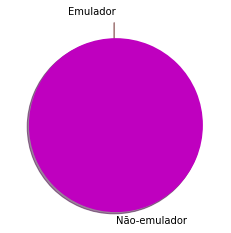

In [105]:
def graficoEmulador(parquetPath):
    """
    Função: O aplicativo recebe muitos acessos de emuladores?
    """
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    colunaEmulador = dataframe["is_emulator"].values
    zeroSize = 0
    oneSize = 0
    for element in colunaEmulador:
        if element == 0:
            zeroSize+= 1
        if element == 1:
            oneSize += 1
    votos = [oneSize, zeroSize]
    opcoes = ['Emulador', "Não-emulador"]
    colunas = ['r', 'm']
    print(zeroSize, oneSize)
    # Criando um gráfico
    plt.pie(votos, labels = opcoes, colors = colunas, startangle = 90, shadow = True, explode = (0.1, 0.1))
    plt.show()
graficoEmulador('final')

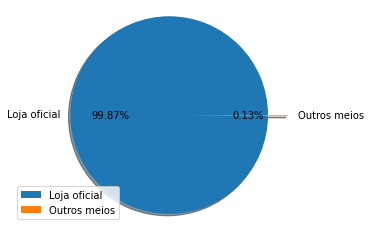

In [106]:
def graficoLoja(parquetPath):
    """
    Função: O aplicativo é instalado na maioria das vezes pela loja oficial ou fora da loja?
    """
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    colunaLoja = dataframe["is_from_official_store"].values
    zeroSize = 0
    oneSize = 0
    for element in colunaLoja:
        if element == 0:
            zeroSize+= 1
        if element == 1:
            oneSize += 1
    votos = [oneSize, zeroSize]
    opcoes = ['Loja oficial', "Outros meios"]
    explode = (0.1, 0.1) 
    plt.pie(votos, labels=opcoes, autopct='%1.2f%%', shadow=True, explode=explode)
    plt.legend(opcoes, loc=3)
    plt.axis('equal')
    plt.show()
graficoLoja('final')

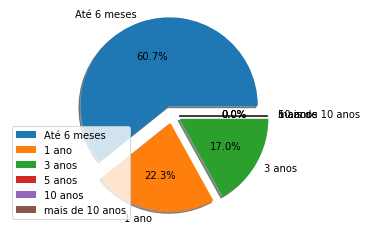

In [107]:
def graficoIdadeDispositivo(parquetPath):
    """
    Função: Existem muitos acessos de dispositivos antigos?
    """
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    colunaIdade = dataframe["device_age_ms"].values
    colunaLoja = dataframe["is_from_official_store"].values
    contadorAte6Meses = 0
    contadorAte1Ano = 0
    contadorAte3Anos = 0
    contadorAte5Anos = 0
    contadorAte10Anos = 0
    contadorMaisQue10Anos = 0
    ano = 31536000000.0
    for element in colunaIdade:
        if element < ano/2:
            contadorAte6Meses += 1
        elif element < ano:
            contadorAte1Ano += 1
        elif element < 3 * ano:
            contadorAte3Anos += 1
        elif element < 5 * ano:
            contadorAte5Anos += 1
        elif element <  10 * ano:
            contadorAte10Anos += 1
        elif element > 10 * ano:
            contadorMaisQue10Anos += 1
    grupos = ['Até 6 meses', '1 ano', '3 anos', '5 anos', '10 anos', 'mais de 10 anos']
    valores = [contadorAte6Meses, contadorAte1Ano, contadorAte3Anos, contadorAte5Anos, contadorAte10Anos, contadorMaisQue10Anos]
    explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 
    plt.pie(valores, labels=grupos, autopct='%1.1f%%', shadow=True, explode=explode)
    plt.legend(grupos, loc=3)
    plt.axis('equal')
    plt.show()
graficoIdadeDispositivo('final')

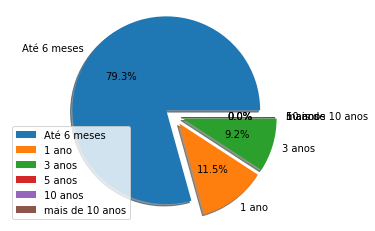

In [108]:
def graficoIdadeLoja(parquetPath):
    """
    Função: Idade do dispositivo que não foi instalado na loja oficial?
    """
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    dataframenumpy = dataframe.to_numpy()
    contadorAte6Meses = 0
    contadorAte1Ano = 0
    contadorAte3Anos = 0
    contadorAte5Anos = 0
    contadorAte10Anos = 0
    contadorMaisQue10Anos = 0
    ano = 31536000000.0
    for linha in dataframenumpy:
        if linha[5] == False:
            if linha[10] < ano/2:
                contadorAte6Meses += 1
            elif linha[10] < ano:
                contadorAte1Ano += 1
            elif linha[10] < 3 * ano:
                contadorAte3Anos += 1
            elif linha[10] < 5 * ano:
                contadorAte5Anos += 1
            elif linha[10] <  10 * ano:
                contadorAte10Anos += 1
            elif linha[10] > 10 * ano:
                contadorMaisQue10Anos += 1
    grupos = ['Até 6 meses', '1 ano', '3 anos', '5 anos', '10 anos', 'mais de 10 anos']
    valores = [contadorAte6Meses, contadorAte1Ano, contadorAte3Anos, contadorAte5Anos, contadorAte10Anos, contadorMaisQue10Anos]
    explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1) 
    plt.pie(valores, labels=grupos, autopct='%1.1f%%', shadow=True, explode=explode)
    plt.legend(grupos, loc=3)
    plt.axis('equal')
    plt.show()
graficoIdadeLoja('final')

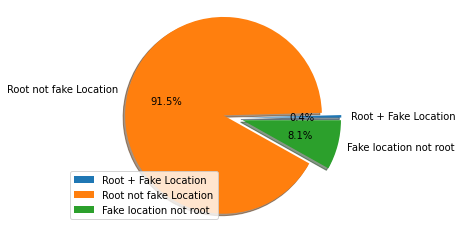

In [109]:
def graficoRootFakeLocation(parquetPath):
    """
    Função: Tem alguma ligacao entre root e fake location?
    """
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    dataframenumpy = dataframe.to_numpy()
    fakeLocationPlusRoot = 0
    fakeLocationNotRoot = 0
    rootNotFakeLocation = 0
    for linha in dataframenumpy:
        if linha[7] == True and linha[9] == True:
            fakeLocationPlusRoot += 1
        if linha[7] == True and linha[9] == False:
            fakeLocationNotRoot += 1
        if linha[7] == False and linha[9] == True:
            rootNotFakeLocation += 1
    grupos = ["Root + Fake Location", "Root not fake Location", "Fake location not root"]
    valores = [fakeLocationPlusRoot, fakeLocationNotRoot, rootNotFakeLocation]
    explode = (0.1, 0.1, 0.1) 
    plt.pie(valores, labels=grupos, autopct='%1.1f%%', shadow=True, explode=explode)
    plt.legend(grupos, loc=3)
    plt.axis('equal')
    plt.show()
graficoRootFakeLocation('final')

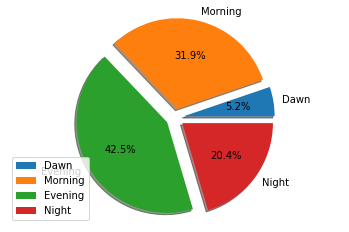

In [110]:
def graficoPeriodDay(parquetPath):
    """
    Função: Qual periodo do dia as pessoas costumam entrar mais?
    """
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    dataframenumpy = dataframe.to_numpy()
    dawn = 0
    morning = 0
    evening = 0
    night = 0
    for linha in dataframenumpy:
        if linha[18] == 'dawn':
            dawn += 1
        if linha[18] == 'morning':
            morning += 1
        if linha[18] == 'evening':
            evening += 1
        if linha[18] == 'night':
            night += 1
    grupos = ["Dawn", "Morning", "Evening", 'Night']
    valores = [dawn, morning, evening, night]
    explode = (0.1, 0.1, 0.1, 0.1) 
    plt.pie(valores, labels=grupos, autopct='%1.1f%%', shadow=True, explode=explode)
    plt.legend(grupos, loc=3)
    plt.axis('equal')
    plt.show()
graficoPeriodDay('data2')

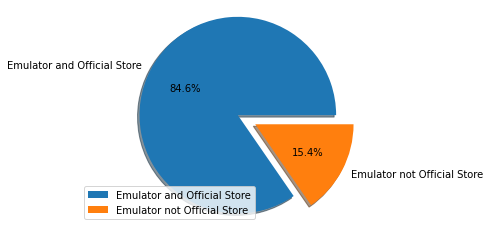

In [111]:
def graficoEmulador2(parquetPath):

    # Tem alguma ligacao entre usar emulador e instalar o app sem ser pela loja?

    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    linhas = dataframe.to_numpy()

    emulatorAndOfficial = 0
    emulatorAndNotOfficial = 0
    #1 conta/acoountid dentre todas as contas:
    for linha in linhas:
        #is_emulator ou is_from_official_store, ou ambos os casos?
        if linha[6] == True and linha[5] == True:
            emulatorAndOfficial+=1
        elif linha[6] == True and linha[5] == False:
            emulatorAndNotOfficial += 1
    grupos = ["Emulator and Official Store", "Emulator not Official Store"]
    valores = [emulatorAndOfficial, emulatorAndNotOfficial]
    explode = (0.1, 0.1) 
    plt.pie(valores, labels=grupos, autopct='%1.1f%%', shadow=True, explode=explode)
    plt.legend(grupos, loc=3)
    plt.axis('equal')
    plt.show()

graficoEmulador2("final")

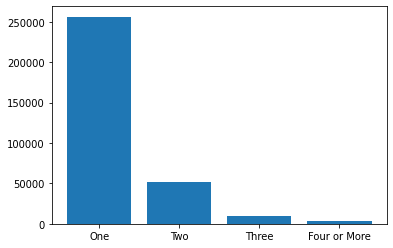

In [112]:
def graficoDeviceAmountPerAccount(parquetPath):
    """
    Função: Quantidade de dispositivos que uma conta ja fez login?
    """
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    dataframenumpy = dataframe.to_numpy()
    one = 0
    two = 0
    three = 0
    fourOrMore = 0
    for linha in dataframenumpy:
        if linha[1] == 1:
            one += 1
        if linha[1] == 2:
            two += 1
        if linha[1] == 3:
            three += 1
        if linha[1] >= 4:
            fourOrMore += 1
    grupos = ["One", "Two", "Three", 'Four or More']
    valores = [one, two, three, fourOrMore]
    plt.bar(grupos, valores)
    plt.show()
graficoDeviceAmountPerAccount('data5')

95868 301972


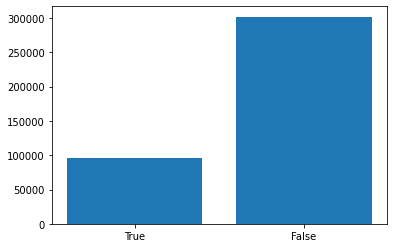

In [113]:
def graficoBootCountEqualsNAccounts(parquetPath):
    """
    Função: Tem alguma ligacao entre quantidade de reinicializacoes com o n de contas que o dispositivo fez login?
    """
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    dataframenumpy = dataframe.to_numpy()
    true = 0
    false = 0
    for linha in dataframenumpy:
        if linha[1] == True:
            true += 1
        if linha[1] == False:
            false += 1
    print(true, false)
    grupos = ["True", "False"]
    valores = [true, false]
    plt.bar(grupos, valores)
    plt.show()
graficoBootCountEqualsNAccounts('data6')

1 397839


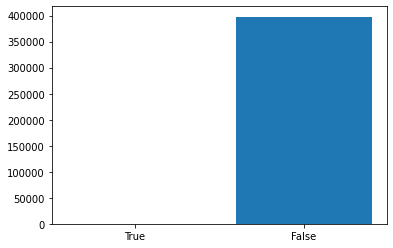

In [114]:
def graficoAccountInEmulatorAndDevice(parquetPath):
    """
    Função: Quantas contas foram acessadas no emulador e num device?
    """
    dataframe = pd.read_parquet(f'{parquetPath}.parquet3', engine="pyarrow")
    dataframenumpy = dataframe.to_numpy()
    true = 0
    false = 0
    for linha in dataframenumpy:
        if linha[1] == True:
            true += 1
        if linha[1] == False:
            false += 1
    print(true, false)
    grupos = ["True", "False"]
    valores = [true, false]
    plt.bar(grupos, valores)
    plt.show()
graficoAccountInEmulatorAndDevice('data7')

In [115]:
dataframe = pd.read_parquet('data2.parquet3')
print(dataframe.head(5))

             id        account_id         device_id   installation_id  \
0  799740346707  TqOdN7Cur7dtEdK7  V1/mpO8Eb5fy/87f  HwLha2eyuH87iOHw   
1  799740346708  I+G2HszxtyUbCVsW  gKXXaMs2g+gnkHOt  5JRPK8+KpnkGLGJR   
2  799740346709  5sfgFfXCFYj6iNuD  kuo6ArO8jK+wNzVK  SodNn8Yr7znCjf6z   
3  799740346710  J64jLpE2HpKoR2So  jbR+9pwpd5El8Xug  WwDbJdena2/yXSv0   
4  799740346711  0Ui1Br2v3WBi6qim  DQRaW4xrifVhH3+Z  /q9io2xZDrfDSSFJ   

      timestamp  is_from_official_store  is_emulator  has_fake_location_app  \
0  1.619888e+12                     1.0          0.0                    0.0   
1  1.621366e+12                     1.0          0.0                    0.0   
2  1.624017e+12                     1.0          0.0                    0.0   
3  1.626304e+12                     1.0          0.0                    0.0   
4  1.618733e+12                     1.0          0.0                    0.0   

   has_fake_location_enabled  probable_root  device_age_ms  \
0                       

In [116]:
dataframe = pd.read_parquet('data2.parquet3')
is_emulator_mean = dataframe[dataframe['is_emulator'] == 1.0]['local_date_time'].mean()
print("A media de data dos emuladores sao maiores que 2020?", is_emulator_mean > datetime.datetime(2020,12,13))

A media de data dos emuladores sao maiores que 2020? True


In [117]:
dataframe = pd.read_parquet('data2.parquet3')
is_emulator = dataframe[dataframe['is_emulator'] == 1.0]
old_emulator = is_emulator[is_emulator['local_date_time'] <= datetime.datetime(2021,12,13)]
old_emulator = old_emulator[old_emulator['local_date_time'] >= datetime.datetime(2020,12,13)]
print("emuladores com no maximo 1 ano de idade:", old_emulator.size)
old_emulator = is_emulator[is_emulator['local_date_time'] < datetime.datetime(2020,12,13)]
old_emulator = old_emulator[old_emulator['local_date_time'] >= datetime.datetime(2019,12,13)]
print("emuladores com no maximo 2 anos de idade:", old_emulator.size)
old_emulator = is_emulator[is_emulator['local_date_time'] < datetime.datetime(2019,12,13)]
print("emuladores com 3 ou mais anos de idade:", old_emulator.size)

emuladores com no maximo 1 ano de idade: 741
emuladores com no maximo 2 anos de idade: 0
emuladores com 3 ou mais anos de idade: 0


In [119]:
dataframe = pd.read_parquet('final.parquet3')
account_id_count = dataframe['account_id'].unique().size
print("Quantas contas diferentes tem na base:", account_id_count)


Quantas contas diferentes tem na base: 321469


In [120]:
dataframe = pd.read_parquet('final.parquet3')
account_id_count = dataframe['device_id'].unique().size
print("Quantos dispositivos diferentes tem na base:", account_id_count)

Quantos dispositivos diferentes tem na base: 397840
